# Exploratory Data Analysis on Compas Dataset
##  By Chaitanya Vallabhaneni

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
compas_raw = pd.read_csv('data/compas-scores-raw.csv')

In [6]:
compas_raw.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [8]:
compas_raw.shape

(60843, 28)

In [9]:
compas_raw.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [10]:
compas_raw['Ethnic_Code_Text'].unique()

array(['Caucasian', 'African-American', 'Hispanic', 'Other', 'Asian',
       'African-Am', 'Native American', 'Oriental', 'Arabic'],
      dtype=object)

In [11]:
compas_raw.loc[compas_raw['Ethnic_Code_Text'] == 'African-Am', 'Ethnic_Code_Text'] = 'African-American'

In [12]:
raw_sex = compas_raw.loc[:,["Sex_Code_Text"]]
raw_sex_grouped = raw_sex.groupby(["Sex_Code_Text"]).size().reset_index()
raw_sex_grouped.columns = ["Sex_Code_Text","count"]
raw_sex_grouped

,Sex_Code_Text,count
0,Female,13329
1,Male,47514


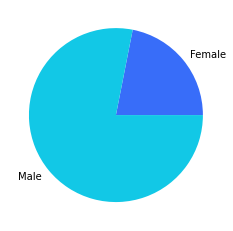

In [48]:
plt.pie(raw_sex_grouped['count'], labels=raw_sex_grouped['Sex_Code_Text']);

In [14]:
raw_ethnic = compas_raw.loc[:,["Ethnic_Code_Text"]]
raw_ethnic_grouped = raw_ethnic.groupby(["Ethnic_Code_Text"]).size().reset_index()
raw_ethnic_grouped.columns = ["Ethnic_Code_Text","count"]
raw_ethnic_grouped

,Ethnic_Code_Text,count
0,African-American,27069
1,Arabic,75
2,Asian,324
3,Caucasian,21783
4,Hispanic,8742
5,Native American,219
6,Oriental,39
7,Other,2592


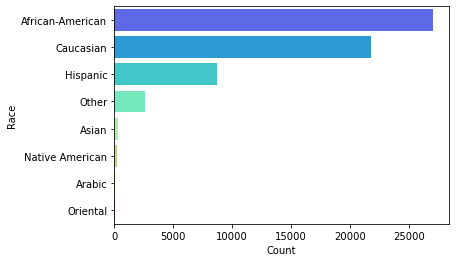

In [47]:
sns.barplot(y = 'Ethnic_Code_Text', x = 'count', data = raw_ethnic_grouped.sort_values('count', ascending=False), palette='rainbow')
plt.xlabel('Count')
plt.ylabel('Race');

In [27]:
raw_english = compas_raw.loc[:,["Language"]]
raw_english_grouped = raw_english.groupby(["Language"]).size().reset_index()
raw_english_grouped.columns = ["Language","count"]
raw_english_grouped

,Language,count
0,English,60591
1,Spanish,252


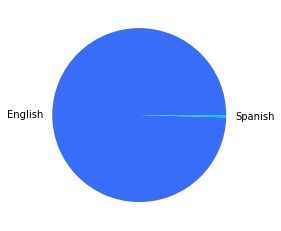

In [46]:
plt.pie(raw_english_grouped['count'], labels=raw_english_grouped['Language']);

In [32]:
raw_marriage = compas_raw.loc[:,["MaritalStatus"]]
raw_marriage_grouped = raw_marriage.groupby(["MaritalStatus"]).size().reset_index()
raw_marriage_grouped.columns = ["MaritalStatus","count"]
raw_marriage_grouped

,MaritalStatus,count
0,Divorced,3879
1,Married,8172
2,Separated,1803
3,Significant Other,1260
4,Single,45126
5,Unknown,213
6,Widowed,390


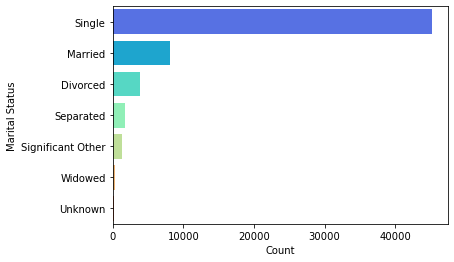

In [43]:
sns.barplot(y = 'MaritalStatus', x = 'count', data = raw_marriage_grouped.sort_values('count', ascending=False),palette='rainbow')
plt.xlabel('Count')
plt.ylabel('Marital Status');

In [34]:
raw_legalstatus = compas_raw.loc[:,["LegalStatus"]]
raw_legalstatus_grouped = raw_legalstatus.groupby(["LegalStatus"]).size().reset_index()
raw_legalstatus_grouped.columns = ["LegalStatus","count"]
raw_legalstatus_grouped

,LegalStatus,count
0,Conditional Release,420
1,Deferred Sentencing,12
2,Other,4356
3,Parole Violator,18
4,Post Sentence,18333
5,Pretrial,37578
6,Probation Violator,126


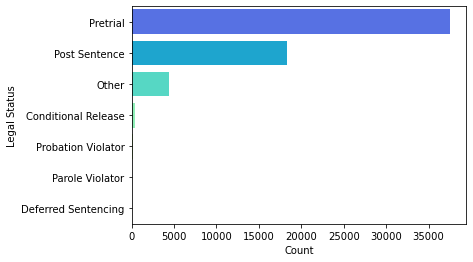

In [42]:
sns.barplot(y = 'LegalStatus', x = 'count', data = raw_legalstatus_grouped.sort_values('count', ascending=False),palette='rainbow')
plt.xlabel('Count')
plt.ylabel('Legal Status');

In [39]:
raw_custody = compas_raw.loc[:,["CustodyStatus"]]
raw_custody_grouped = raw_custody.groupby(["CustodyStatus"]).size().reset_index()
raw_custody_grouped.columns = ["CustodyStatus","count"]
raw_custody_grouped

,CustodyStatus,count
0,Jail Inmate,30129
1,Parole,21
2,Pretrial Defendant,7644
3,Prison Inmate,15
4,Probation,22968
5,Residential Program,66


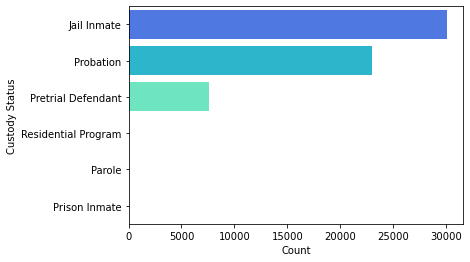

In [41]:
sns.barplot(y = 'CustodyStatus', x = 'count', data = raw_custody_grouped.sort_values('count', ascending=False), palette='rainbow')
plt.xlabel('Count')
plt.ylabel('Custody Status');

In [49]:
raw_agency = compas_raw.loc[:,["Agency_Text"]]
raw_agency_grouped = raw_agency.groupby(["Agency_Text"]).size().reset_index()
raw_agency_grouped.columns = ["Agency_Text","count"]
raw_agency_grouped

,Agency_Text,count
0,Broward County,123
1,DRRD,564
2,PRETRIAL,41100
3,Probation,19056


In [50]:
raw_reason = compas_raw.loc[:,["AssessmentReason"]]
raw_reason_grouped = raw_reason.groupby(["AssessmentReason"]).size().reset_index()
raw_reason_grouped.columns = ["AssessmentReason","count"]
raw_reason_grouped

,AssessmentReason,count
0,Intake,60843


In [51]:
compas_two_year = pd.read_csv('data/compas-scores-two-years.csv')
compas_two_year_violent = pd.read_csv('data/compas-scores-two-years-violent.csv')

In [52]:
compas_two_year.shape

(7214, 53)

In [53]:
compas_two_year.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [54]:
compas_two_year_violent.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0


In [56]:
compas_two_year_violent.shape

(4743, 54)

In [57]:
violent_sex = compas_two_year_violent.loc[:,["sex"]]
violent_sex_grouped = violent_sex.groupby(["sex"]).size().reset_index()
violent_sex_grouped.columns = ["sex","count"]
violent_sex_grouped

,sex,count
0,Female,997
1,Male,3746


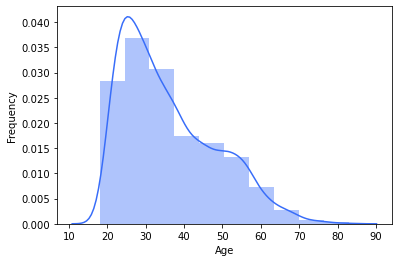

In [58]:
sns.distplot(compas_two_year_violent['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency');

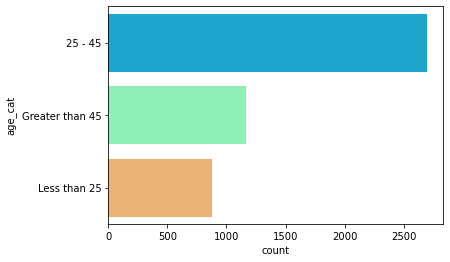

In [59]:
age_cat_grouped = compas_two_year_violent.groupby(["age_cat"]).size().reset_index()
age_cat_grouped.columns = ["age_cat","count"]
sns.barplot(y = 'age_cat', x = 'count', data = age_cat_grouped, palette='rainbow');

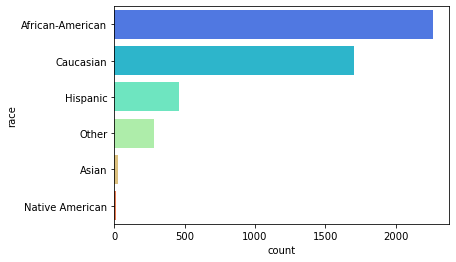

In [60]:
race_grouped = compas_two_year_violent.groupby(["race"]).size().reset_index()
race_grouped.columns = ["race","count"]
sns.barplot(y = 'race', x = 'count', data = race_grouped.sort_values('count', ascending=False),palette='rainbow');